 # Cars Data Analysis

### Importing Libraries and Data

In [29]:
# importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [30]:
os.chdir("D:\Data Science\Project\Cars Data")
os.getcwd()

'D:\\Data Science\\Project\\Cars Data'

In [31]:
# Read data set
df = pd.read_csv("cars_data.csv" , header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As the dataset doesn't contain any headers, we will replace the header and rechecked the dataset.

In [32]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

#replacing the header into the dataframe
df.columns = headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [33]:
# Creating a copy of original dataset
df_org = df.copy()

## Data Wrangling

#### - Data type conversion

In [34]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [35]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

We can observe many numerical columns have been assigned wrong data types. So we need to change them to correct data types.

In [36]:
# Converting to proper data type
l = ['normalized-losses','bore', 'stroke','horsepower','peak-rpm','price']

for i in l:
    df[i]= pd.to_numeric(df[i], errors='coerce')
    
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [37]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


#### - Missing Value Analysis

As we can see, several NaN appeared in the dataframe, those are missing values which may hinder our further analysis.

In [38]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [39]:
#counting missing value percentage
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Count'})
missing_val['Missing_percentage'] = (missing_val['Count']/len(df)*100)
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val[missing_val['Missing_percentage']>0]

,Variables,Count,Missing_percentage
0,normalized-losses,41,20.00000
1,price,4,1.95122
2,stroke,4,1.95122
3,bore,4,1.95122
4,peak-rpm,2,0.97561
5,num-of-doors,2,0.97561
6,horsepower,2,0.97561


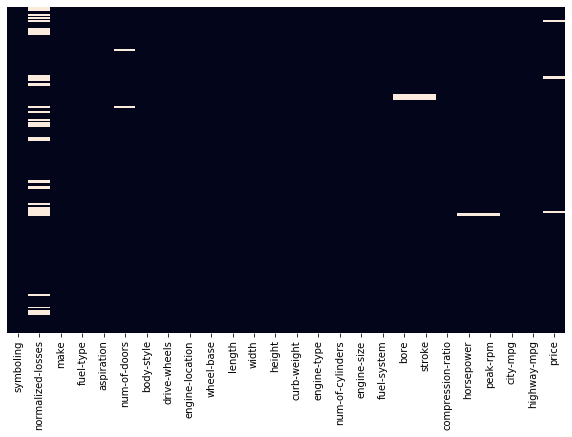

In [40]:
# Visualization of missing Values

def fun(df):
    plt.figure(figsize=(10,6))
    sns.heatmap(data=df.isnull(), yticklabels=False, cbar=False)
    plt.show()
    
fun(df)

#### Imputing Missing Values

In [41]:
# drop whole row with NaN in "price" column as it is the target variable
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped rows
df.reset_index(drop=True, inplace=True)

In [42]:
l=['normalized-losses','bore', 'stroke','horsepower','peak-rpm']
for i in l:
    df[i].fillna(df[i].mean(), axis=0, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

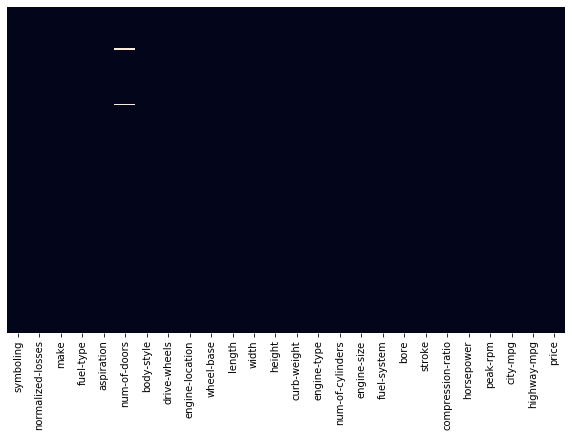

In [44]:
fun(df)

In [45]:
df['num-of-doors'].replace(np.nan,df['num-of-doors'].mode()[0], inplace=True)

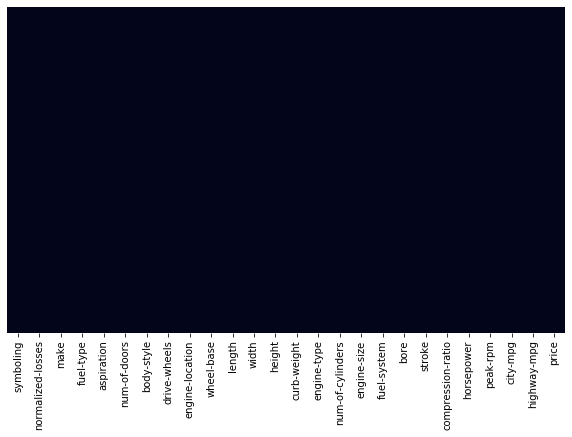

In [46]:
fun(df)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [48]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


#### Feature Scaling

In [49]:
df.shape

(201, 26)

In [50]:
#sns.pairplot(data=df)

In [51]:
l=['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
for i in l:
    df[[i]]=StandardScaler().fit_transform(df[[i]])
    
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,0.075389,mpfi,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,0.036314
1,3,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,0.075389,mpfi,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,0.415385
2,1,0.000000,alfa-romero,gas,std,two,hatchback,rwd,front,-0.710103,...,0.606234,mpfi,-2.433435,0.675938,-0.291435,1.357649,-0.246556,-0.964397,-0.689386,0.415385
3,2,1.315931,audi,gas,std,four,sedan,fwd,front,0.165748,...,-0.431327,mpfi,-0.526210,0.453899,-0.041121,-0.037480,0.801833,-0.184027,-0.100993,0.093711
4,2,1.315931,audi,gas,std,four,sedan,4wd,front,0.099646,...,0.220165,mpfi,-0.526210,0.453899,-0.541748,0.311302,0.801833,-1.120471,-1.277779,0.535224


In [52]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


In [114]:
l=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i in l:
    print('\n',i,'\n')
    print(df[i].value_counts())


 make 

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

 fuel-type 

gas       181
diesel     20
Name: fuel-type, dtype: int64

 aspiration 

std      165
turbo     36
Name: aspiration, dtype: int64

 num-of-doors 

four    115
two      86
Name: num-of-doors, dtype: int64

 body-style 

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

 drive-wheels 

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

 engine-location 

front    198
rear       3
Name: engine-location, dtype: int64

 engin

In [97]:
dummy =pd.get_dummies(df['fuel-type'], prefix='fuel-type', drop_first=True)
df=pd.concat([df,dummy],axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type_gas
0,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,mpfi,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,0.036314,1
1,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,mpfi,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,0.415385,1
2,0.127193,0.000000,alfa-romero,gas,std,two,hatchback,rwd,front,-0.710103,...,mpfi,-2.433435,0.675938,-0.291435,1.357649,-0.246556,-0.964397,-0.689386,0.415385,1
3,0.926121,1.315931,audi,gas,std,four,sedan,fwd,front,0.165748,...,mpfi,-0.526210,0.453899,-0.041121,-0.037480,0.801833,-0.184027,-0.100993,0.093711,1
4,0.926121,1.315931,audi,gas,std,four,sedan,4wd,front,0.099646,...,mpfi,-0.526210,0.453899,-0.541748,0.311302,0.801833,-1.120471,-1.277779,0.535224,1


In [100]:
dummy =pd.get_dummies(df['aspiration'], prefix='aspiration').drop('aspiration_turbo',axis=1)
df=pd.concat([df,dummy],axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_turbo,num-of-doors_two,aspiration_std
0,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,0.036314,1,0,1,1
1,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,0.415385,1,0,1,1
2,0.127193,0.000000,alfa-romero,gas,std,two,hatchback,rwd,front,-0.710103,...,-0.291435,1.357649,-0.246556,-0.964397,-0.689386,0.415385,1,0,1,1
3,0.926121,1.315931,audi,gas,std,four,sedan,fwd,front,0.165748,...,-0.041121,-0.037480,0.801833,-0.184027,-0.100993,0.093711,1,0,0,1
4,0.926121,1.315931,audi,gas,std,four,sedan,4wd,front,0.099646,...,-0.541748,0.311302,0.801833,-1.120471,-1.277779,0.535224,1,0,0,1


In [102]:
dummy =pd.get_dummies(df['num-of-doors'], prefix='num-of-doors').drop('num-of-doors_two',axis=1)
df=pd.concat([df,dummy],axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_turbo,num-of-doors_two,aspiration_std,num-of-doors_four
0,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,0.203984,-0.246556,-0.652249,-0.542288,0.036314,1,0,1,1,0
1,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,0.203984,-0.246556,-0.652249,-0.542288,0.415385,1,0,1,1,0
2,0.127193,0.000000,alfa-romero,gas,std,two,hatchback,rwd,front,-0.710103,...,1.357649,-0.246556,-0.964397,-0.689386,0.415385,1,0,1,1,0
3,0.926121,1.315931,audi,gas,std,four,sedan,fwd,front,0.165748,...,-0.037480,0.801833,-0.184027,-0.100993,0.093711,1,0,0,1,1
4,0.926121,1.315931,audi,gas,std,four,sedan,4wd,front,0.099646,...,0.311302,0.801833,-1.120471,-1.277779,0.535224,1,0,0,1,1


In [106]:
dummy =pd.get_dummies(df['engine-location'], prefix='engine-location').drop('engine-location_rear',axis=1)
df=pd.concat([df,dummy],axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_std,num-of-doors_four,engine-location_front
0,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,0.036314,1,1,0,1
1,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,0.415385,1,1,0,1
2,0.127193,0.000000,alfa-romero,gas,std,two,hatchback,rwd,front,-0.710103,...,-0.291435,1.357649,-0.246556,-0.964397,-0.689386,0.415385,1,1,0,1
3,0.926121,1.315931,audi,gas,std,four,sedan,fwd,front,0.165748,...,-0.041121,-0.037480,0.801833,-0.184027,-0.100993,0.093711,1,1,1,1
4,0.926121,1.315931,audi,gas,std,four,sedan,4wd,front,0.099646,...,-0.541748,0.311302,0.801833,-1.120471,-1.277779,0.535224,1,1,1,1


In [117]:
dummy =pd.get_dummies(df['drive-wheels'], prefix='drive-wheels',drop_first=True)
df=pd.concat([df,dummy],axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_std,num-of-doors_four,engine-location_front,drive-wheels_fwd,drive-wheels_rwd
0,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,-0.246556,-0.652249,-0.542288,0.036314,1,1,0,1,0,1
1,1.725050,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,-0.246556,-0.652249,-0.542288,0.415385,1,1,0,1,0,1
2,0.127193,0.000000,alfa-romero,gas,std,two,hatchback,rwd,front,-0.710103,...,-0.246556,-0.964397,-0.689386,0.415385,1,1,0,1,0,1
3,0.926121,1.315931,audi,gas,std,four,sedan,fwd,front,0.165748,...,0.801833,-0.184027,-0.100993,0.093711,1,1,1,1,1,0
4,0.926121,1.315931,audi,gas,std,four,sedan,4wd,front,0.099646,...,0.801833,-1.120471,-1.277779,0.535224,1,1,1,1,0,0


In [119]:
df.drop(['drive-wheels','engine-location','num-of-doors','aspiration','fuel-type'],axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,engine-type,...,peak-rpm,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_std,num-of-doors_four,engine-location_front,drive-wheels_fwd,drive-wheels_rwd
0,1.725050,0.000000,alfa-romero,convertible,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,dohc,...,-0.246556,-0.652249,-0.542288,0.036314,1,1,0,1,0,1
1,1.725050,0.000000,alfa-romero,convertible,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,dohc,...,-0.246556,-0.652249,-0.542288,0.415385,1,1,0,1,0,1
2,0.127193,0.000000,alfa-romero,hatchback,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,ohcv,...,-0.246556,-0.964397,-0.689386,0.415385,1,1,0,1,0,1
3,0.926121,1.315931,audi,sedan,0.165748,0.195176,0.148335,0.218425,-0.423766,ohc,...,0.801833,-0.184027,-0.100993,0.093711,1,1,1,1,1,0
4,0.926121,1.315931,audi,sedan,0.099646,0.195176,0.243744,0.218425,0.520017,ohc,...,0.801833,-1.120471,-1.277779,0.535224,1,1,1,1,0,0


#### Data Visualization

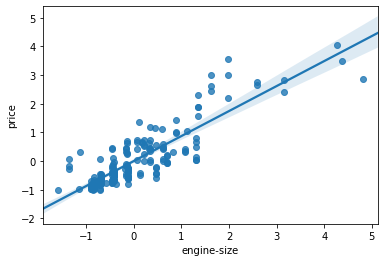

In [125]:
# engine size as a potential predictor of price
sns.regplot(x="engine-size", y="price", data=df)
plt.show()

In [126]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


This indicates a positive correlation between these two variables. Engine size seems like a pretty good predictor of price.

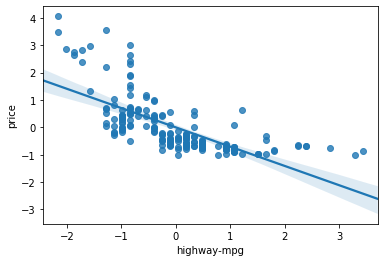

In [130]:
# Highway mpg is a potential predictor variable of price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.show()

In [132]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


This indicates negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

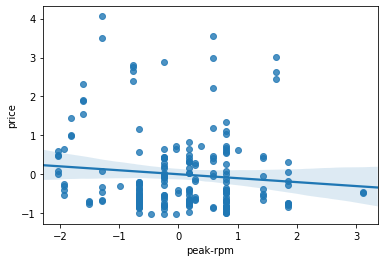

In [133]:
# Peak-rpm as a predictor of price
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show()

In [134]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


Peak rpm does not seem like a good predictor of the price since the regression line is close to horizontal. The correlation between 'peak-rpm' and 'price' is low.

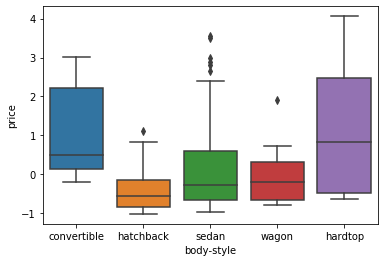

In [136]:
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.

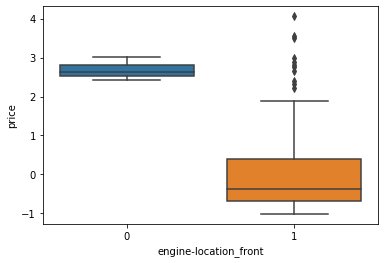

In [138]:
sns.boxplot(x="engine-location_front", y="price", data=df)
plt.show()

 we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

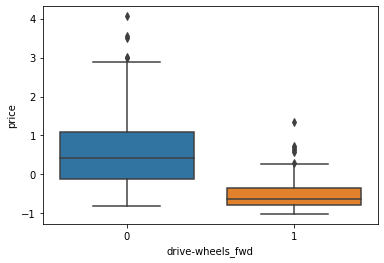

In [139]:
sns.boxplot(data=df,x='drive-wheels_fwd',y='price')
plt.show()

we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

#### Descriptive Statistics

In [141]:
# grouping results
df_gptest = df[['body-style','price']]
grouped_test_bodystyle = df_gptest.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,1.095379
1,hardtop,1.135494
2,hatchback,-0.409938
3,sedan,0.158015
4,wagon,-0.105354


In [189]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_std,num-of-doors_four,engine-location_front,drive-wheels_fwd,drive-wheels_rwd
symboling,1.000000,4.662638e-01,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.279719,-0.035527,0.036233,-0.082391,0.196735,0.054615,-0.672344,-2.123389e-01,0.103220,-0.082676
normalized-losses,0.466264,1.000000e+00,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.239544,-0.225016,-0.181877,0.133999,0.101546,0.006911,-0.361368,2.548121e-17,-0.238079,0.301356
wheel-base,-0.535987,-5.666124e-02,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,-0.360233,-0.470606,-0.543304,0.584642,-0.307237,-0.256889,0.445245,1.891150e-01,-0.460120,0.499829
length,-0.365404,1.942356e-02,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,-0.286035,-0.665192,-0.698142,0.690628,-0.211187,-0.230085,0.395122,5.308613e-02,-0.504691,0.538156
width,-0.242423,8.680206e-02,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,-0.245852,-0.633531,-0.680635,0.751265,-0.244356,-0.305732,0.227655,5.220549e-02,-0.458939,0.507028
height,-0.550160,-3.737370e-01,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.309913,-0.049800,-0.104812,0.135486,-0.281578,-0.090336,0.538383,1.092253e-01,-0.108286,0.040866
curb-weight,-0.233118,9.940425e-02,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,-0.279350,-0.749543,-0.794889,0.834415,-0.221046,-0.321955,0.208517,-5.128729e-02,-0.658408,0.670611
engine-size,-0.110581,1.123600e-01,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,-0.256753,-0.650546,-0.679571,0.872335,-0.070779,-0.110040,0.024094,-1.993671e-01,-0.511364,0.559063
bore,-0.139896,-2.979985e-02,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,-0.267338,-0.582121,-0.591390,0.543154,-0.054435,-0.227782,0.119140,-1.884041e-01,-0.582834,0.564714
stroke,-0.007992,5.512732e-02,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,-0.063720,-0.034079,-0.034741,0.082267,-0.241033,-0.218190,-0.007780,1.393508e-01,0.129661,-0.021214


In [143]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [147]:
numeric=list(df.select_dtypes(include=[np.number]).columns.values)

In [161]:
numeric.remove('price')
numeric

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'fuel-type_gas',
 'aspiration_std',
 'num-of-doors_four',
 'engine-location_front',
 'drive-wheels_fwd',
 'drive-wheels_rwd']

In [156]:
for i in numeric:
    pearson_coef, p_value = stats.pearsonr(df[i], df['price'])
    print("\nThe Pearson Correlation Coefficient of ",i," is ", round(pearson_coef,3), " with a P-value of P = ", round(p_value,5))


The Pearson Correlation Coefficient of  symboling  is  -0.082  with a P-value of P =  0.24491

The Pearson Correlation Coefficient of  normalized-losses  is  0.134  with a P-value of P =  0.0579

The Pearson Correlation Coefficient of  wheel-base  is  0.585  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  length  is  0.691  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  width  is  0.751  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  height  is  0.135  with a P-value of P =  0.05515

The Pearson Correlation Coefficient of  curb-weight  is  0.834  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  engine-size  is  0.872  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  bore  is  0.543  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  stroke  is  0.082  with a P-value of P =  0.24563

The Pearson Correlation Coefficient of  compression-ratio  is  0.071  with a P-value of 

In [200]:
pd.DataFrame(df.corr()['price'])

,price
symboling,-0.082391
normalized-losses,0.133999
wheel-base,0.584642
length,0.690628
width,0.751265
height,0.135486
curb-weight,0.834415
engine-size,0.872335
bore,0.543154
stroke,0.082267


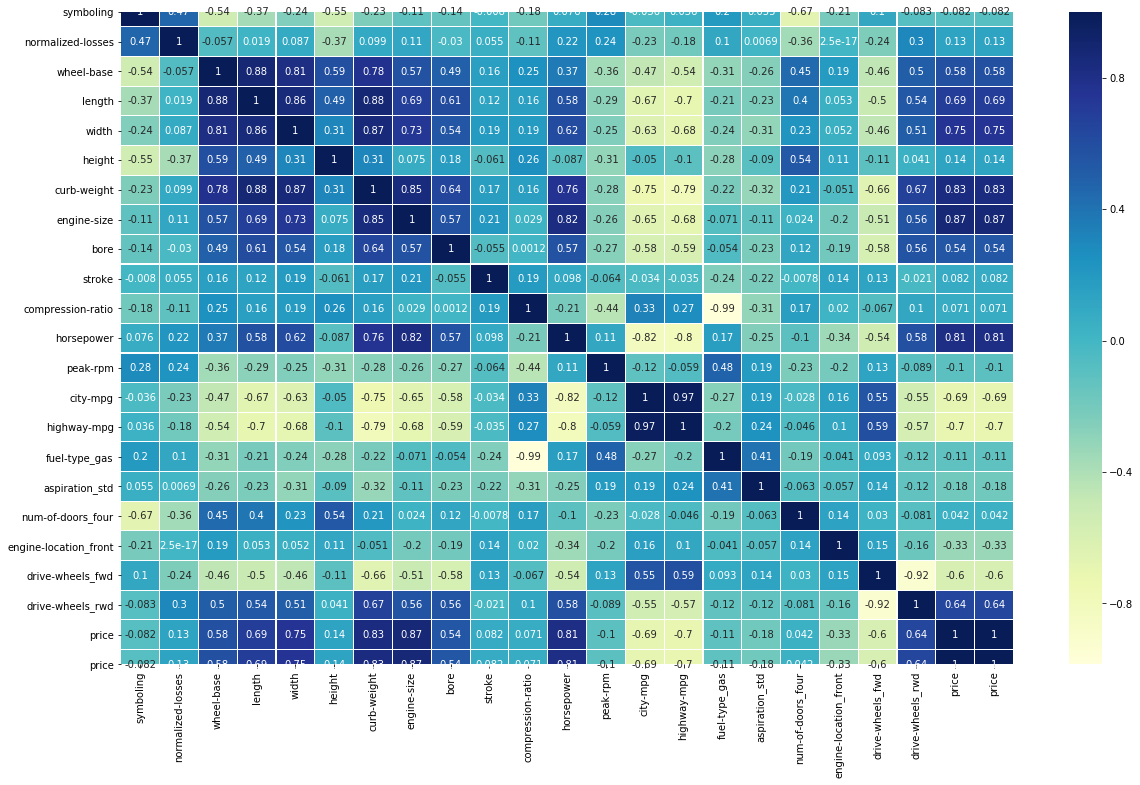

In [176]:
numeric.append('price')
plt.figure(figsize=(20,12))
sns.heatmap(data=df[numeric].corr(),yticklabels=True,linewidths=.1,cmap='YlGnBu',annot=True)
plt.show()

### Model Selection:

In [209]:
valid=[]
for i in numeric:
    pearson_coef, p_value = stats.pearsonr(df[i], df['price'])
    if(abs(pearson_coef)>=0.5):
        valid.append(i)
        print("\nThe Pearson Correlation Coefficient of ",i," is ", round(pearson_coef,3), " with a P-value of P = ", round(p_value,5))
valid.remove('price')
print(valid)


The Pearson Correlation Coefficient of  wheel-base  is  0.585  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  length  is  0.691  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  width  is  0.751  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  curb-weight  is  0.834  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  engine-size  is  0.872  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  bore  is  0.543  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  horsepower  is  0.81  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  city-mpg  is  -0.687  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  highway-mpg  is  -0.705  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  drive-wheels_fwd  is  -0.596  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  drive-wheels_rwd  is  0.638  with a P-value of P =  0.0

In [57]:
from scipy.stats import chi2_contingency

l=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i in l:
    print("\n",i)
    x,p,f,ex = chi2_contingency(pd.crosstab(df[i],df['price']))
    print(x,"\t",p,"\t",f)


 make
3997.2914805782457 	 0.10215327612248802 	 3885

 fuel-type
189.83950276243095 	 0.38819551076625824 	 185

 aspiration
197.59924242424245 	 0.24978293267828222 	 185

 num-of-doors
194.87244691607685 	 0.294976434626614 	 185

 body-style
770.4995807259074 	 0.21201966680052464 	 740

 drive-wheels
386.39411016949157 	 0.26815491347065173 	 370

 engine-location
201.0 	 0.19950619789355845 	 185

 engine-type
964.751127320955 	 0.17703490291216578 	 925

 num-of-cylinders
1201.172372611465 	 0.028814865669137168 	 1110

 fuel-system
1368.1809370882745 	 0.07711093084933536 	 1295


In [58]:
pd.crosstab(df['drive-wheels'],df['price'])

price,-1.020418,-1.016255,-1.010704,-0.991404,-0.986232,-0.984970,-0.972356,-0.963147,-0.897172,-0.885314,...,2.626486,2.646165,2.756165,2.818481,2.875247,2.986257,3.004926,3.500935,3.545718,4.061027
drive-wheels,,,,,,,,,,,,,,,,,,,,,
4wd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fwd,1,1,1,1,1,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
rwd,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [210]:
valid.remove('price')
print(valid)

['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'drive-wheels_fwd', 'drive-wheels_rwd']


In [213]:
X=df[valid]
X[0:10]

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,drive-wheels_fwd,drive-wheels_rwd
0,-1.685107,-0.439409,-0.853460,-0.014858,0.075389,0.520894,0.203984,-0.652249,-0.542288,0,1
1,-1.685107,-0.439409,-0.853460,-0.014858,0.075389,0.520894,0.203984,-0.652249,-0.542288,0,1
2,-0.710103,-0.244152,-0.185597,0.518080,0.606234,-2.433435,1.357649,-0.964397,-0.689386,0,1
3,0.165748,0.195176,0.148335,-0.423766,-0.431327,-0.526210,-0.037480,-0.184027,-0.100993,1,0
4,0.099646,0.195176,0.243744,0.520017,0.220165,-0.526210,0.311302,-1.120471,-1.277779,0,0
5,0.165748,0.252126,0.196040,-0.094314,0.220165,-0.526210,0.177155,-0.964397,-0.836484,1,0
6,1.157278,1.505026,2.628971,0.558777,0.220165,-0.526210,0.177155,-0.964397,-0.836484,1,0
7,1.157278,1.505026,2.628971,0.771951,0.220165,-0.526210,0.177155,-0.964397,-0.836484,1,0
8,1.157278,1.505026,2.628971,1.027761,0.099518,-0.750589,0.982037,-1.276544,-1.571976,1,0
9,0.397105,0.211448,-0.519528,-0.311364,-0.455456,0.633084,-0.064310,-0.340101,-0.248091,0,1


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X,df['price'], test_size=0.3, random_state=27)

print(X_test.shape, '\t', X_train.shape)

(61, 11) 	 (140, 11)


#### Linear Regression Model

In [220]:
lm=LinearRegression().fit(X_train,y_train)

In [221]:
y_lm=lm.predict(X_test)
y_lm[0:10]

array([ 0.28822954, -0.85337055, -0.40600534, -0.93855079,  0.45963419,
       -0.79225661,  0.82584807,  0.19295996, -0.09197846, -0.81300054])

In [225]:
rmse_lm=np.sqrt(mean_squared_error(y_lm,y_test))
print("Root Mean Square Error for Linear Regression =" ,rmse_lm)

Root Mean Square Error for Linear Regression = 0.5221268724812342


In [226]:
print("r2 score for Linear Regression Model =" ,r2_score(y_test,y_lm))

r2 score for Linear Regression Model = 0.6961651110023511


In [235]:
def model_plot(y):
    plt.figure(figsize=(10,7))
    ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
    sns.distplot(y, hist=False, color="b", label="Fitted Values" , ax=ax1)

    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')

    plt.show()

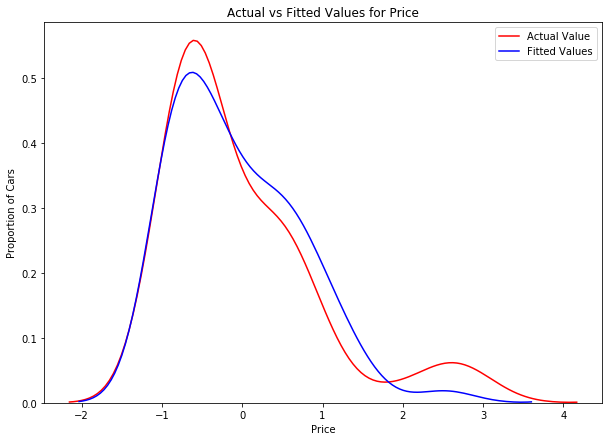

In [236]:
model_plot(y_lm)

*Using Linear Regression Model:*
- Root Mean Square Error = 0.522
- r2_score = 0.696

#### Decision Tree

In [230]:
dt=DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)
y_dt = dt.predict(X_test)

In [242]:
rmse_dt=np.sqrt(mean_squared_error(y_dt,y_test))
print("Root Mean Square Error for Decision Tree =" ,rmse_dt)

print("r2 score for Decision Tree =" ,r2_score(y_test,y_dt))

Root Mean Square Error for Decision Tree = 0.3583570349863616
r2 score for Decision Tree = 0.8568743672716765


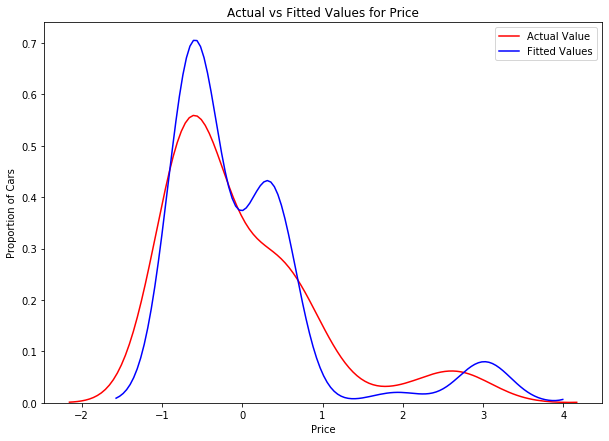

In [241]:
model_plot(y_dt)

*Decision Tree Model:*
- Root Mean Square Error = 0.358
- r2_score  = 0.856

#### Random Forrest

In [244]:
rf=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
y_rf=rf.predict(X_test)

In [247]:
rmse_rf=np.sqrt(mean_squared_error(y_rf,y_test))
print("Root Mean Square Error for Random Forrest =" ,rmse_rf)

print("r2 score for Random Forrest =" ,r2_score(y_test,y_rf))

Root Mean Square Error for Random Forrest = 0.3212296669400452
r2 score for Random Forrest = 0.8849949674547863


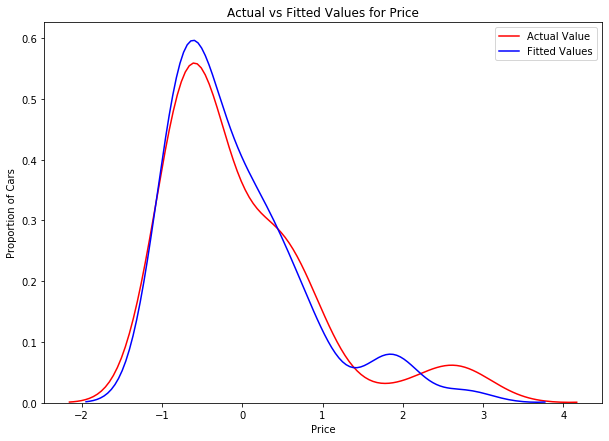

In [246]:
model_plot(y_rf)

*Random Forrest Model:*
- Root Mean Square Error for Random Forrest = 0.321
- r2 score for Random Forrest = 0.884

As the r2_score of Random Forrest Regressor is high and the RMSE is less, we select Random Forrest Model for the dataset.